In [1]:
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Linear Regression Implementation

L(x) = loss function. J(x) = cost function.
$$J(x) = \frac{1}{N} \sum L(x) $$
$$ = \frac{1}{N} \sum \left(y - \^{y}\right)^2 $$
$$ = \frac{1}{N} \sum \left(y - mx - b\right)^2 $$
$$ \frac{\partial J}{\partial m} = \frac{2}{N} \sum x \cdot \left(y - mx - b\right)$$
$$ \frac{\partial J}{\partial m} = \frac{2}{N} \sum x \cdot \left(y - \^{y} \right)$$
$$ \frac{\partial J}{\partial m} = 2 \cdot \overline{x \left(y - \^{y} \right)}$$
$$ \frac{\partial J}{\partial b} = 2 \cdot \overline{\left(y - \^{y} \right)}$$

In [10]:
class LinReg:
    #hyperparameters
    lr = 0.01
    defEpochs = 1000
    
    #model values
    weights = np.random.uniform(-2,2,(2,))
    gradients = np.array([0, 0])
    finalCost = 0

    def __init__(self, lr = lr):
        self.lr = lr

    def pred(self, x):
        return self.weights[0] + self.weights[1] * x
    
    def loss(self, x, y):
        return (self.pred(x) - y)**2 # MSE loss

    def cost(self, x, y):
        return np.average(self.loss(x, y))
    
    def fit(self, x_data, y_data, epochs = defEpochs):
        for _ in range(epochs):
            self.finalCost = self.cost(x_data, y_data)
            self.gradients[0] = 2 * np.average((self.pred(x_data) - y_data)) # dJ/db
            self.gradients[1] = 2 * np.average(x_data * (self.pred(x_data) - y_data)) # dJ/dm

            self.weights -= self.gradients * self.lr # subtraction for gradient descent

# Examples

In [15]:
def test(fn):
    x = np.array(range(0, 10))
    y = np.array(list(map(fn, x)))

    linreg = LinReg()
    linreg.fit(x, y)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, linreg.pred(x), label='prediction')
    plt.plot([], [], ' ', label="Final loss: " + str(round(linreg.finalCost, 2)))

    plt.legend(loc="upper left")

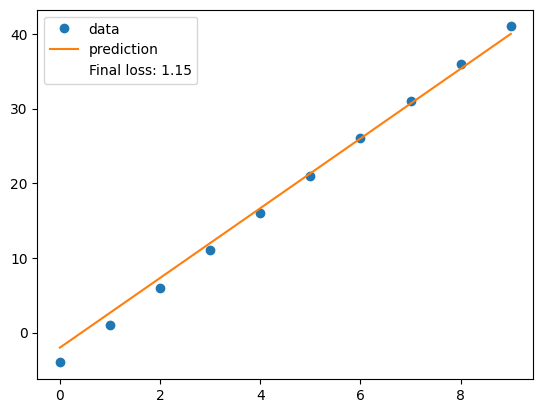

In [16]:
test(lambda x: 5*x - 4)

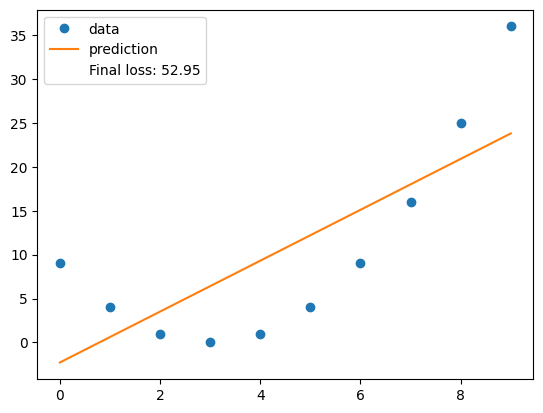

In [17]:
test(lambda x: (x-3)**2)

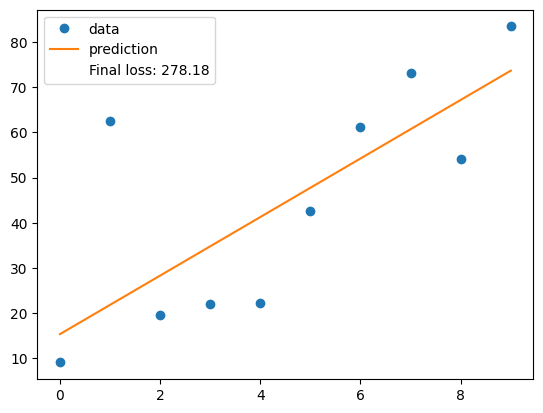

In [18]:
def fn(x):
    return 10 * np.sin(x) + 5 * x + np.random.random() * 50

test(fn)